# Three Generations Romance

In [1]:
import pandas as pd
from numpy import nan

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

The original file was way too large for my computer to handle. I could not work on it not only on my own laptop with jupyter running locally, but also it didn't work on online platforms like google collab as well. My computer ran out of memory all the time. I managed to take a look at the data, and saw that the majority of the data was missing. There were 51,000 rows where all the values were NaN. I could not drop these rows in jupyter while working because my computer could not handle anything after calling read_csv(), so I wrote a simple python program to drop all these rows and save the rest as 'romance_small.csv', so I am reading that file here. I will be sending my python program as well as this notebook.s

In [2]:
df = pd.read_csv('romance_small.csv')

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.shape

(9514, 31)

In [5]:
nullsum = df.isnull().sum()

In [6]:
nullsum[nullsum > 0]

body_type     848
diet         3753
drinks        502
drugs        2299
education    1055
essay0        847
essay1       1167
essay2       1465
essay3       1824
essay4       1635
essay5       1700
essay6       2162
essay7       1961
essay8       3153
essay9       1960
ethnicity     949
job          1331
offspring    5628
pets         3162
religion     3253
sign         1738
smokes        918
speaks          6
dtype: int64

In [7]:
(nullsum * 100 / len(df))[nullsum > 0]

body_type     8.913181
diet         39.447131
drinks        5.276435
drugs        24.164389
education    11.088922
essay0        8.902670
essay1       12.266134
essay2       15.398360
essay3       19.171747
essay4       17.185201
essay5       17.868404
essay6       22.724406
essay7       20.611730
essay8       33.140635
essay9       20.601219
ethnicity     9.974774
job          13.989910
offspring    59.154930
pets         33.235232
religion     34.191717
sign         18.267816
smokes        9.648938
speaks        0.063065
dtype: float64

## Age Prediction

We will select some columns to predict the age of the users.

In [8]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [9]:
_df = df # save df before changing it.

In [10]:
df = df[[
    'age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
    'height', 'income', 'job', 'last_online', 'offspring', 'orientation',
    'pets', 'religion', 'smokes', 'status'
]]

In [11]:
df.head()

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,offspring,orientation,pets,religion,smokes,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,75.0,-1.0,transportation,2012-06-28-20-30,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,sometimes,single
1,35.0,average,mostly other,often,sometimes,working on space camp,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,no,single
2,38.0,thin,anything,socially,NaN,graduated from masters program,68.0,-1.0,NaN,2012-06-27-09-10,NaN,straight,has cats,NaN,no,available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,71.0,20000.0,student,2012-06-28-14-22,doesn&rsquo;t want kids,straight,likes cats,NaN,no,single
4,29.0,athletic,NaN,socially,never,graduated from college/university,66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,NaN,straight,likes dogs and likes cats,NaN,no,single


### Cleaning up the data

#### Religion

We do not need the explanation of the religion, just the religion itself.

In [12]:
df['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

The float values in this column are the null values. We are going to ignore them for now.

In [13]:
df.loc[:, 'religion'] = [r.split()[0] if type(r) != float else r for r in df['religion']]

In [14]:
df['religion'].unique()

array(['agnosticism', nan, 'atheism', 'christianity', 'other',
       'catholicism', 'buddhism', 'judaism', 'hinduism', 'islam'],
      dtype=object)

We will merge the catholicism and christianity values, since christianity encapsulated catholicism.

In [15]:
df.loc[:, 'religion'] = ['christianity' if r == 'catholicism' else r for r in df['religion']]

In [16]:
df['religion'].unique()

array(['agnosticism', nan, 'atheism', 'christianity', 'other', 'buddhism',
       'judaism', 'hinduism', 'islam'], dtype=object)

We will merge agnosticism and atheism as well since they are very similiar.

In [17]:
df.loc[:, 'religion'] = ['atheism' if r == 'agnosticism' else r for r in df['religion']]

In [18]:
df['religion'].unique()

array(['atheism', nan, 'christianity', 'other', 'buddhism', 'judaism',
       'hinduism', 'islam'], dtype=object)

##### Lets visualize this

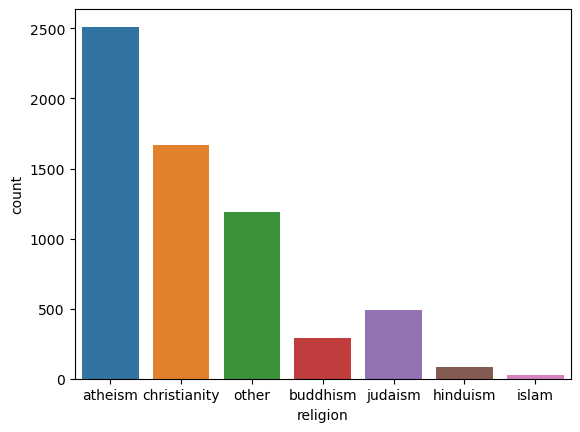

In [55]:
import seaborn as sns

sns.countplot(x=df['religion'], hue=df['religion'], legend=False);

In [20]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height',
       'income', 'job', 'last_online', 'offspring', 'orientation', 'pets',
       'religion', 'smokes', 'status'],
      dtype='object')

#### Body type

In [21]:
df['body_type'].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

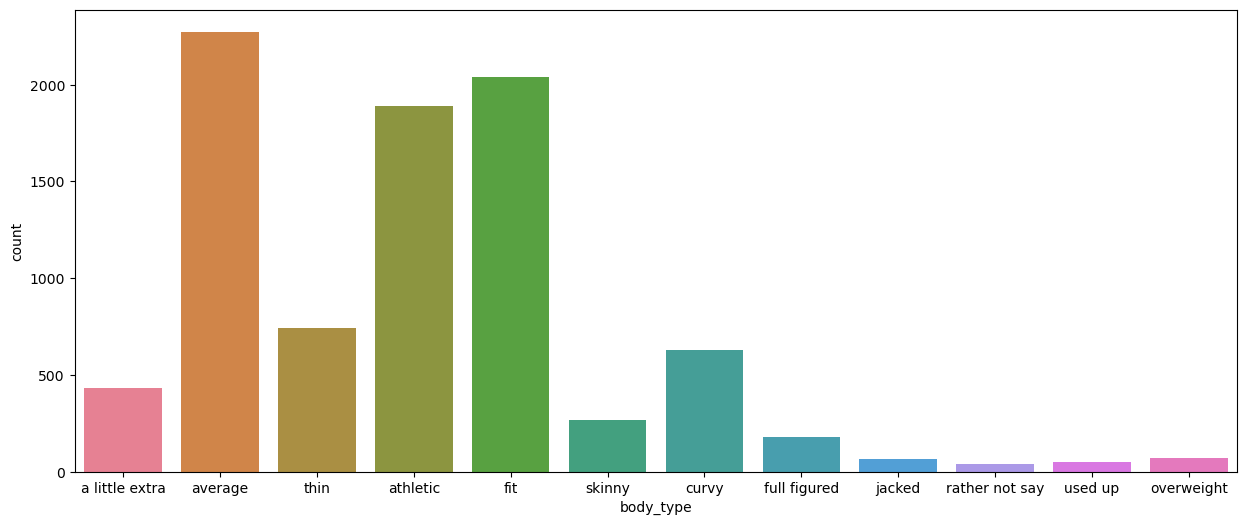

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.countplot(x=df['body_type'], hue=df['body_type'], legend=False);

In [23]:
df.loc[:, 'body_type'] = ['large' if s == 'a little extra' or s == 'full figured' or s == 'overweight' else s for s in df['body_type']]

In [24]:
df.loc[:, 'body_type'] = ['fit' if s == 'athletic' or s == 'fit' or s == 'jacked' or s == 'curvy' else s for s in df['body_type']]

In [25]:
df.loc[:, 'body_type'] = ['skinny' if s == 'thin' or s == 'skinny' else s for s in df['body_type']]

In [26]:
df['body_type'].unique()

array(['large', 'average', 'skinny', 'fit', nan, 'rather not say',
       'used up'], dtype=object)

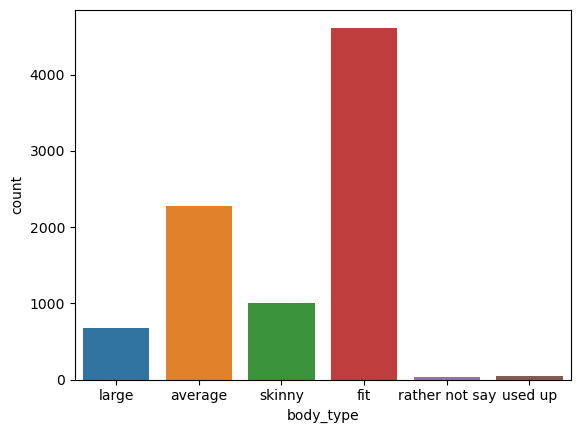

In [27]:
sns.countplot(x=df['body_type'], hue=df['body_type'], legend=False);

In [28]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height',
       'income', 'job', 'last_online', 'offspring', 'orientation', 'pets',
       'religion', 'smokes', 'status'],
      dtype='object')

In [29]:
df['diet'].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

Use only the last word of the diet string to simplify the data. We will use another column for strict diet.

In [30]:
df.loc[:, 'diet'] = [d.split()[-1] if type(d) != float else d for d in df['diet']]

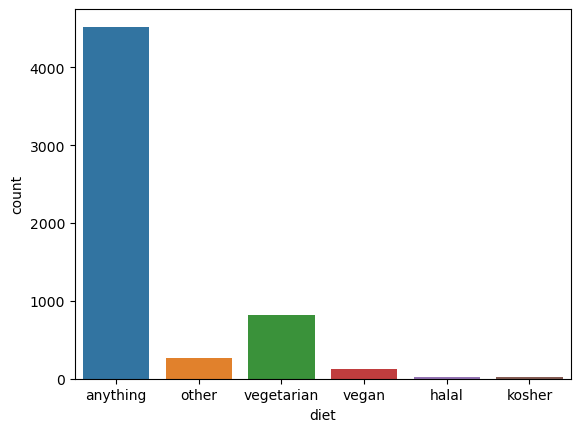

In [31]:
sns.countplot(x=df['diet'], hue=df['diet'], legend=False);

We will merge vegetarian and vegan as they are very similiar.

In [32]:
df.loc[:, 'diet'] = ['vegetarian' if d == 'vegan' else d for d in df['diet']]

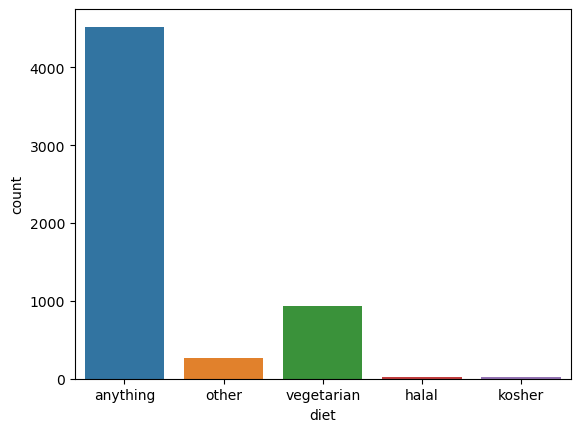

In [33]:
sns.countplot(x=df['diet'], hue=df['diet'], legend=False);

In [34]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height',
       'income', 'job', 'last_online', 'offspring', 'orientation', 'pets',
       'religion', 'smokes', 'status'],
      dtype='object')

In [35]:
df['orientation'].unique()

array(['straight', 'bisexual', 'gay'], dtype=object)

In [36]:
df['drugs'].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

In [37]:
df['offspring'].unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [38]:
df.loc[:, 'offspring'] = df['offspring'].str.replace('&rsquo;', "'")

In [39]:
df['offspring'].unique()

array(["doesn't have kids, but might want them", nan, "doesn't want kids",
       "doesn't have kids, but wants them", "doesn't have kids",
       'wants kids', 'has a kid', 'has kids',
       "doesn't have kids, and doesn't want any",
       "has kids, but doesn't want more",
       "has a kid, but doesn't want more", 'has a kid, and wants more',
       'has kids, and might want more', 'might want kids',
       'has a kid, and might want more', 'has kids, and wants more'],
      dtype=object)

From this column we will get weather the person wants kids or not. Then we will drop it.

In [40]:
df['has_kids'] = [nan if pd.isna(s) else True if ('has kids' in s or 'has a kid' in s) else False for s in df['offspring']]

/var/folders/qp/9j67xhhx3z1_9y5zm_dghclw0000gn/T/ipykernel_4539/3684026976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_kids'] = [nan if pd.isna(s) else True if ('has kids' in s or 'has a kid' in s) else False for s in df['offspring']]


In [41]:
df.drop('has_kids', axis=1, inplace=True)

/var/folders/qp/9j67xhhx3z1_9y5zm_dghclw0000gn/T/ipykernel_4539/2789543417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('has_kids', axis=1, inplace=True)


In [42]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height',
       'income', 'job', 'last_online', 'offspring', 'orientation', 'pets',
       'religion', 'smokes', 'status'],
      dtype='object')

In [43]:
df['smokes'].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

You either smoke or not.

In [44]:
df.loc[:, 'smokes'] = [nan if pd.isna(s) else (False if s == 'no' else True) for s in df['smokes']]
df['smokes'].unique()

array([True, False, nan], dtype=object)

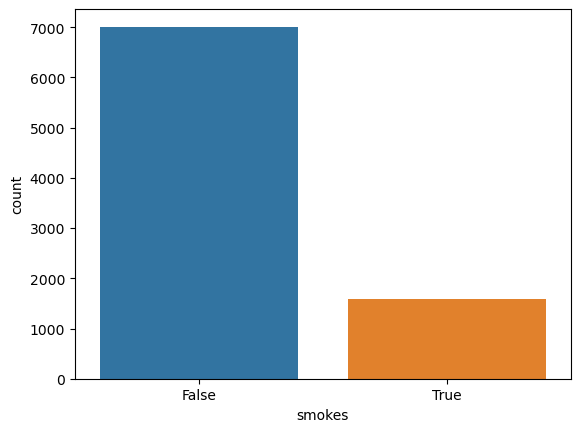

In [45]:
sns.countplot(x=df['smokes'], hue=df['smokes'], legend=False);

In [46]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height',
       'income', 'job', 'last_online', 'offspring', 'orientation', 'pets',
       'religion', 'smokes', 'status'],
      dtype='object')

In [47]:
df['drugs'].unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

Again, you either use drugs or not.

In [48]:
df.loc[:, 'drugs'] = [nan if pd.isna(s) else (False if s == 'never' else True) for s in df['drugs']]
df['drugs'].unique()

array([False, True, nan], dtype=object)

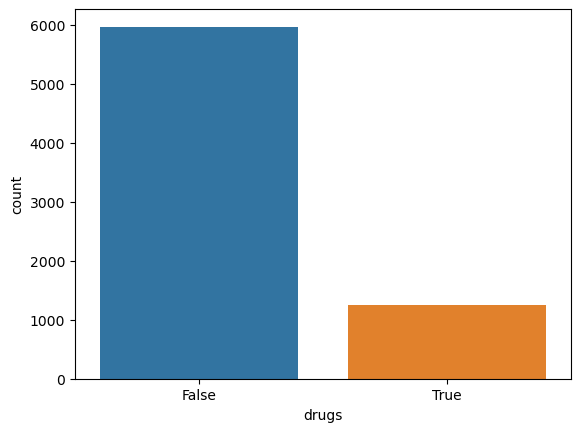

In [49]:
sns.countplot(x=df['drugs'], hue=df['drugs'], legend=False);

In [50]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height',
       'income', 'job', 'last_online', 'offspring', 'orientation', 'pets',
       'religion', 'smokes', 'status'],
      dtype='object')

In [51]:
df.loc[:, 'income'] = [i if i > -1 else nan for i in df['income']]

In [52]:
nulls = df.isnull().sum()

In [53]:
nulls

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
height            0
income         7701
job            1331
last_online       0
offspring      5628
orientation       0
pets           3162
religion       3253
smokes          918
status            0
dtype: int64

In [54]:
nulls[nulls > 0] * 100 / len(df)

body_type     8.913181
diet         39.447131
drinks        5.276435
drugs        24.164389
education    11.088922
income       80.943872
job          13.989910
offspring    59.154930
pets         33.235232
religion     34.191717
smokes        9.648938
dtype: float64

In [56]:
df['education']

0           working on college/university
1                   working on space camp
2          graduated from masters program
3           working on college/university
4       graduated from college/university
5       graduated from college/university
6       graduated from college/university
7       graduated from college/university
8       graduated from college/university
9             working on two-year college
10                                    NaN
11      graduated from college/university
12                                    NaN
13             graduated from high school
14          working on college/university
15      graduated from college/university
16             working on masters program
17          working on college/university
18              graduated from space camp
19         graduated from masters program
20      graduated from college/university
21          working on college/university
22      graduated from college/university
23      graduated from college/uni